In [49]:
# Basic utilities
import os
import csv
import pandas as pd
import numpy as np


# Transformers
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Binarizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.base import BaseEstimator, TransformerMixin


# Models
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

#methods
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

#tools
from sklearn.utils.multiclass import type_of_target
from sklearn.base import BaseEstimator
from sklearn.exceptions import NotFittedError
from sklearn.base import clone
from sklearn.utils.multiclass import unique_labels, type_of_target
from sklearn.utils.validation import check_is_fitted
from sklearn.utils import indexable
from sklearn.utils import _safe_indexing as safe_indexing 
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics._classification import _check_targets
from sklearn.metrics._classification import _check_targets
from sklearn.utils import check_X_y
from sklearn.base import is_regressor as sk_is_regressor
from sklearn.base import is_classifier as sk_is_classifier
from sklearn.base import is_outlier_detector as sk_is_outlier_detector
from yellowbrick.classifier import confusion_matrix



In [50]:
df = pd.read_csv('FEVS5yearT2.csv',sep=',',  low_memory=False)
df.head()

,Unnamed: 0.1,Unnamed: 0,agency_id,Q103,Q104,Q106,Q107,Q113,Q118,Q119,...,Q226_A,Q226_B,Q227_A,Q227_B,Q227_C,Q228_A,Q228_B,Q235_A,Q235_B,Q235_C
0,0,0,TR,2.0,4.0,4.0,4.000000,2.0,5.0,5.0,...,1,0,0,0,0,0,1,0,0,0
1,1,1,AF,3.0,3.0,4.0,2.000000,2.0,2.0,2.0,...,1,0,0,0,0,1,0,0,0,0
2,2,2,TR,5.0,5.0,5.0,3.523792,4.0,5.0,4.0,...,1,0,0,0,0,1,0,0,0,0
3,3,3,TR,4.0,4.0,4.0,4.000000,3.0,4.0,3.0,...,1,0,0,0,0,1,0,0,0,0
4,4,4,HE,5.0,5.0,4.0,5.000000,4.0,5.0,4.0,...,0,1,0,0,0,0,1,0,0,0


In [51]:
df.shape

(2732092, 27)

In [52]:
df.StayorGo.unique()

array(['Stay', 'Retire', 'Transfer', nan, 'Leave'], dtype=object)

In [53]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Q103,Q104,Q106,Q107,Q113,Q118,Q119,Q126,...,Q226_A,Q226_B,Q227_A,Q227_B,Q227_C,Q228_A,Q228_B,Q235_A,Q235_B,Q235_C
count,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,...,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06
mean,1.366046e+06,2.798736e+05,3.626316e+00,3.892961e+00,3.403266e+00,3.523792e+00,3.101778e+00,3.779857e+00,3.177464e+00,4.090176e+00,...,7.140766e-01,1.831589e-01,3.035084e-01,2.452930e-01,2.030869e-01,4.740832e-01,3.971360e-01,1.510879e-01,1.842094e-01,1.950304e-01
std,7.886872e+05,1.680542e+05,1.187627e+00,1.071978e+00,1.175664e+00,1.177966e+00,1.148435e+00,1.078224e+00,1.203159e+00,1.074396e+00,...,4.518532e-01,3.867968e-01,4.597729e-01,4.302609e-01,4.022967e-01,4.993280e-01,4.893047e-01,3.581346e-01,3.876549e-01,3.962242e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.830228e+05,1.366040e+05,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.366046e+06,2.732090e+05,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.049068e+06,4.103192e+05,5.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00,5.000000e+00,...,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.732091e+06,6.247990e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [54]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'agency_id', 'Q103', 'Q104', 'Q106',
       'Q107', 'Q113', 'Q118', 'Q119', 'Q126', 'Q133', 'Q136', 'Q137', 'Q138',
       'Q139', 'StayorGo', 'Q226_A', 'Q226_B', 'Q227_A', 'Q227_B', 'Q227_C',
       'Q228_A', 'Q228_B', 'Q235_A', 'Q235_B', 'Q235_C'],
      dtype='object')

In [56]:
#Joy, I added dropna=False so we could count NaN values in the total
print(df['StayorGo'].value_counts(dropna=False))
print(df['StayorGo'].value_counts()["Stay"])

Stay        1736122
Transfer     442466
Retire       278698
NaN          176148
Leave         98658
Name: StayorGo, dtype: int64
1736122


<AxesSubplot:>

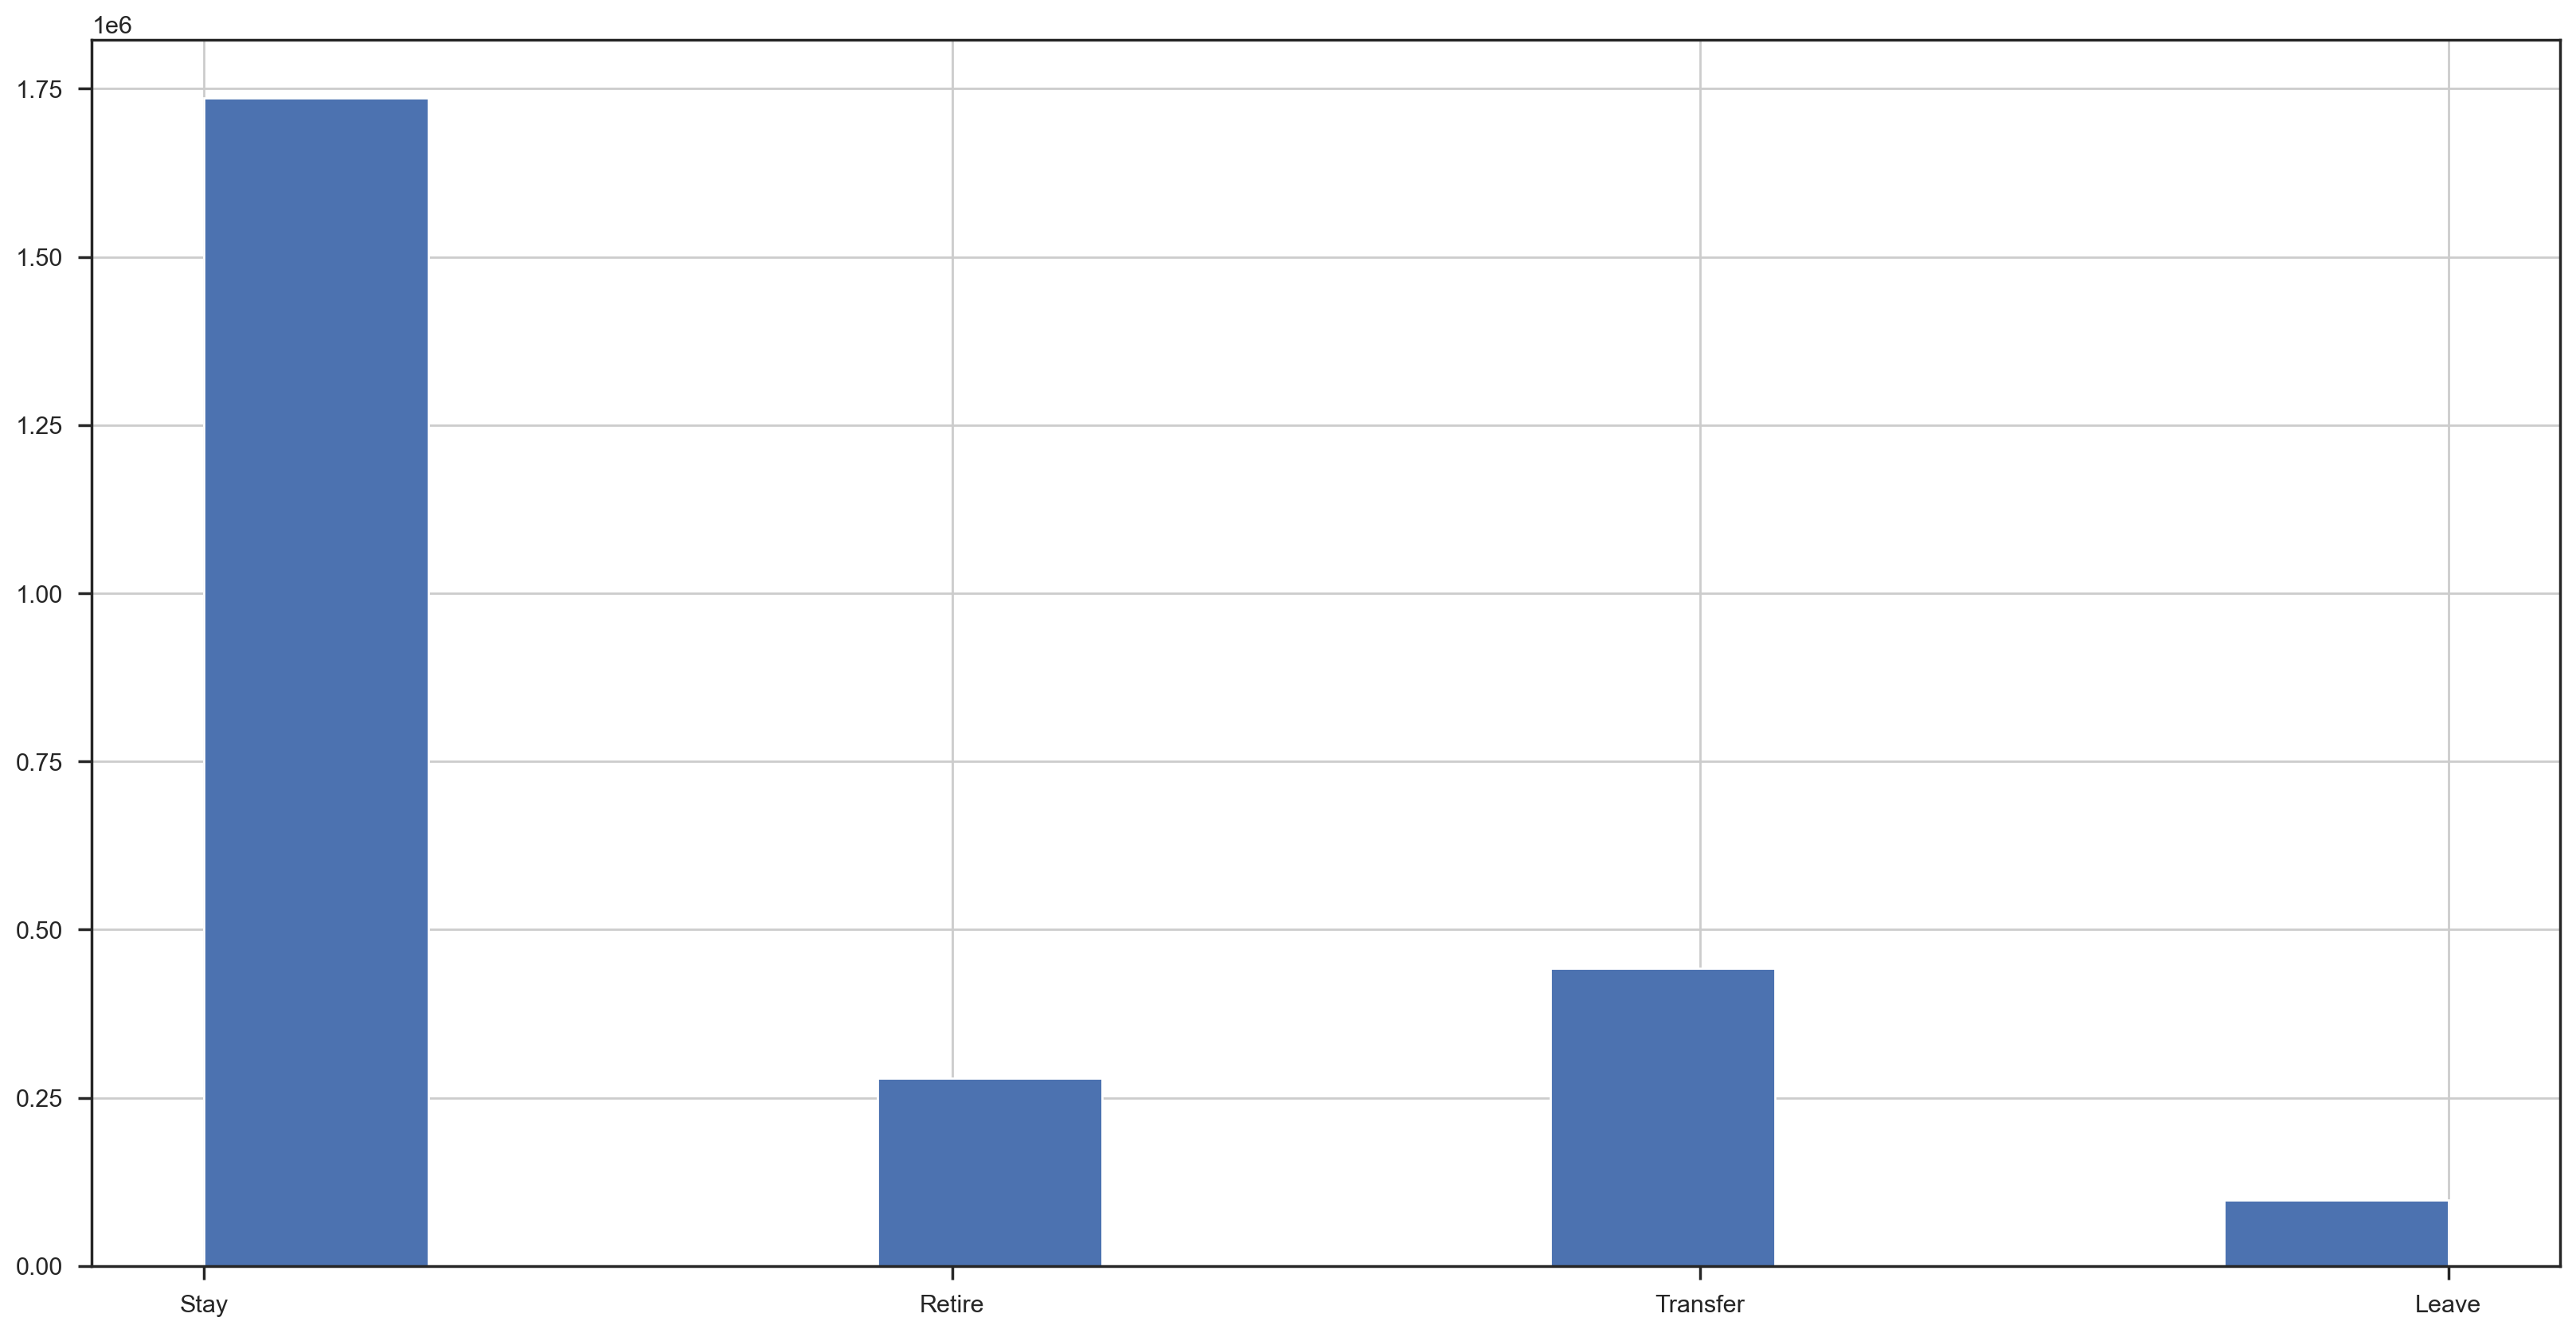

In [58]:
y.hist(figsize=(20,10))


In [59]:
frac=1736122/(1736122+442466+278698+98658)
print(frac)

0.6792488411326696


In [60]:
#to fill na in the "stayorgo" col fractionally 
mask = df['StayorGo'].isna() 
ind = df['StayorGo'].loc[mask].sample(frac=frac).index
df.loc[ind, 'StayorGo'] = "Stay"
df['StayorGo'] = df['StayorGo'].fillna("Go")
print(df)

         Unnamed: 0.1  Unnamed: 0 agency_id  Q103  Q104  Q106      Q107  Q113  \
0                   0           0        TR   2.0   4.0   4.0  4.000000   2.0   
1                   1           1        AF   3.0   3.0   4.0  2.000000   2.0   
2                   2           2        TR   5.0   5.0   5.0  3.523792   4.0   
3                   3           3        TR   4.0   4.0   4.0  4.000000   3.0   
4                   4           4        HE   5.0   5.0   4.0  5.000000   4.0   
...               ...         ...       ...   ...   ...   ...       ...   ...   
2732087       2732087      624795        HS   5.0   4.0   2.0  4.000000   2.0   
2732088       2732088      624796        HS   5.0   4.0   5.0  5.000000   4.0   
2732089       2732089      624797        HS   2.0   3.0   3.0  4.000000   4.0   
2732090       2732090      624798        HS   3.0   4.0   4.0  3.000000   3.0   
2732091       2732091      624799        HS   5.0   5.0   5.0  5.000000   2.0   

         Q118  Q119  ...  Q

In [61]:
df.StayorGo.unique()

array(['Stay', 'Retire', 'Transfer', 'Leave', 'Go'], dtype=object)

In [62]:
df['StayorGo'].value_counts(dropna=False)

Stay        1855770
Transfer     442466
Retire       278698
Leave         98658
Go            56500
Name: StayorGo, dtype: int64

In [64]:
df=df.replace(to_replace='Retire', value='Go')
df=df.replace(to_replace='Transfer', value='Go')
df=df.replace(to_replace='Leave', value='Go')

In [65]:
df['StayorGo'].value_counts(dropna=False)

Stay    1855770
Go       876322
Name: StayorGo, dtype: int64

In [66]:
df.shape

(2732092, 27)

In [67]:
frac2=1848056/(1848056+884036)
print(frac2)

0.6764252448307012


In [68]:
dfstay=df.loc[df['StayorGo'] == 'Stay']
dfstay.StayorGo.unique()

array(['Stay'], dtype=object)

In [73]:
#define X and y
#[other columns already dropped]
X = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'agency_id',"StayorGo"], errors='raise')
y = df['StayorGo']

In [74]:
X.shape

(2732092, 23)

In [75]:
X.rename(columns={"Q137":"SatisfJob", "Q107":"TalentsUsed","Q107":"TalentsUsed","Q118":"RecommendOrg","Q139":"SatisfOrg",
"Q138":"SatisfPay","Q119":"SurveyBetter","Q133":"SrLSupportWL","Q113":"PerfDiffRecog","Q126":"GoodJobBySup","Q235_B":"EducBach",
"Q136": "SatisfRecog","Q106": "WorkloadReas","Q104": "PersAccomp","Q226_A": "NonSupervisor",
"Q228_B":"Female","Q226_B":"Supervisor","Q235_C":"EducMoreBach","Q235_A":"EducLessBach","Q103":"EncourBetter",
"Q228_A":"Male","Q227_B":"11to20Yr","Q227_A":"10orLessYr","Q227_C":"21orMoreYr"}, inplace = True)
X.head()

,EncourBetter,PersAccomp,WorkloadReas,TalentsUsed,PerfDiffRecog,RecommendOrg,SurveyBetter,GoodJobBySup,SrLSupportWL,SatisfRecog,...,NonSupervisor,Supervisor,10orLessYr,11to20Yr,21orMoreYr,Male,Female,EducLessBach,EducBach,EducMoreBach
0,2.0,4.0,4.0,4.000000,2.0,5.0,5.0,4.0,3.000000,3.0,...,1,0,0,0,0,0,1,0,0,0
1,3.0,3.0,4.0,2.000000,2.0,2.0,2.0,3.0,3.638426,3.0,...,1,0,0,0,0,1,0,0,0,0
2,5.0,5.0,5.0,3.523792,4.0,5.0,4.0,4.0,3.638426,4.0,...,1,0,0,0,0,1,0,0,0,0
3,4.0,4.0,4.0,4.000000,3.0,4.0,3.0,5.0,3.000000,2.0,...,1,0,0,0,0,1,0,0,0,0
4,5.0,5.0,4.0,5.000000,4.0,5.0,4.0,5.0,5.000000,5.0,...,0,1,0,0,0,0,1,0,0,0


In [76]:
df.StayorGo.unique()

array(['Stay', 'Go'], dtype=object)

In [77]:
X.columns

Index(['EncourBetter', 'PersAccomp', 'WorkloadReas', 'TalentsUsed',
       'PerfDiffRecog', 'RecommendOrg', 'SurveyBetter', 'GoodJobBySup',
       'SrLSupportWL', 'SatisfRecog', 'SatisfJob', 'SatisfPay', 'SatisfOrg',
       'NonSupervisor', 'Supervisor', '10orLessYr', '11to20Yr', '21orMoreYr',
       'Male', 'Female', 'EducLessBach', 'EducBach', 'EducMoreBach'],
      dtype='object')

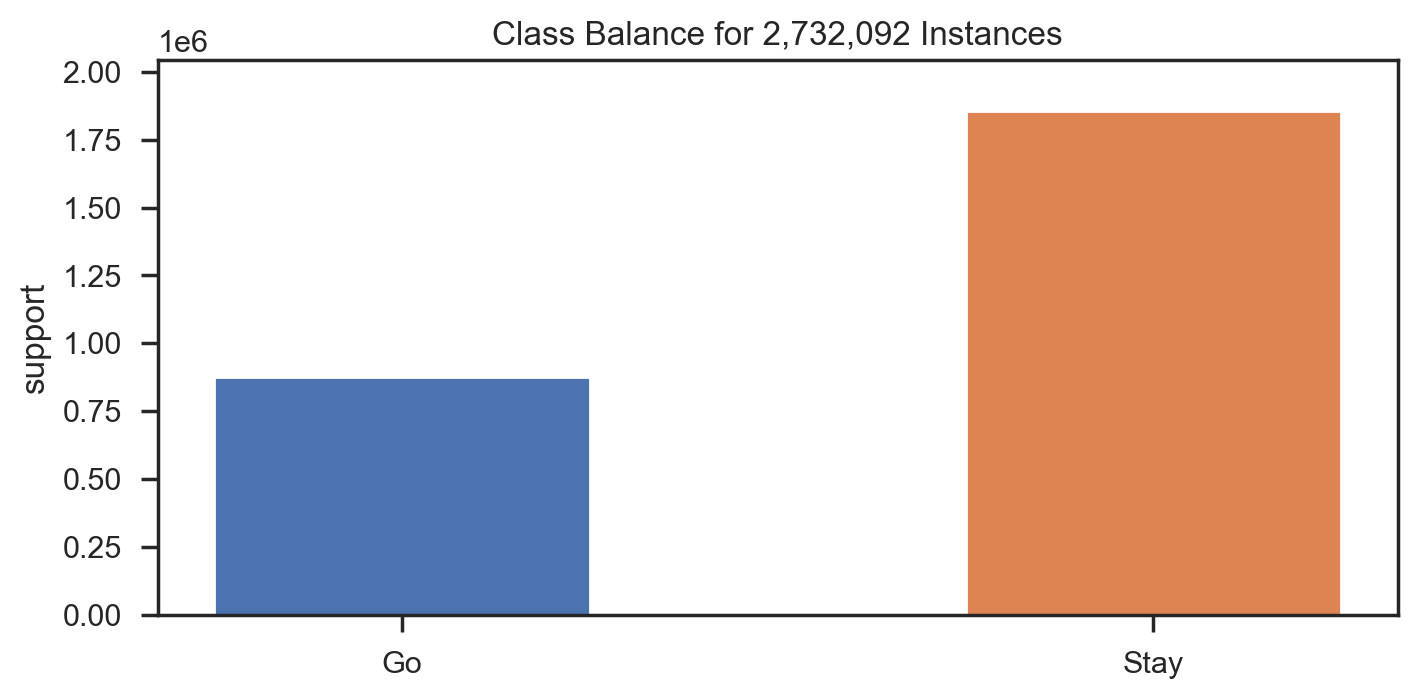

<AxesSubplot:title={'center':'Class Balance for 2,732,092 Instances'}, ylabel='support'>

In [78]:
y=df["StayorGo"]
from yellowbrick.target import ClassBalance
# Instantiate the visualizer
visualizer = ClassBalance(size=(800, 360)
)

visualizer.fit(y)
visualizer.show()

In [90]:
a=100000*0.68
b=100000-68000
print(b)
a

32000


68000.0

In [82]:
# CHANGE SAMPLE SIZE HERE
#
#For 100000 rows: chose 50000 from" Stay"  group, 50000 from" Go" group
#For 200000 rows: chose 100000 from" Stay" group , 100000 from" Go" group
#For 1.8 Million rows: chose 1,000,000 from" Stay" group, 800000 from" Go" group
#run this analysis in this notebook to get the results.

# to get n random rows from "stay" 
dfstay=dfstay.sample(n =68000)

In [83]:
# CHANGE SAMPLE SIZE HERE
# to get n random rows from "go" 
dfgo=df.loc[df['StayorGo'] == 'Go']
dfgo=dfgo.sample(n =32000)

In [84]:
# to create a df where half rows contain stay, and half contain go
dfequal = pd.concat([dfstay, dfgo])

In [85]:
dfequal['StayorGo'].value_counts()

Stay    68000
Go      32000
Name: StayorGo, dtype: int64

In [86]:
dfequal.head()
print(dfequal.shape)

(100000, 27)


In [87]:
dfequal.describe()

,Unnamed: 0.1,Unnamed: 0,Q103,Q104,Q106,Q107,Q113,Q118,Q119,Q126,...,Q226_A,Q226_B,Q227_A,Q227_B,Q227_C,Q228_A,Q228_B,Q235_A,Q235_B,Q235_C
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,1.363619e+06,279752.041660,3.625252,3.891679,3.407642,3.523893,3.101617,3.779782,3.179117,4.086314,...,0.714540,0.18425,0.303940,0.245860,0.202240,0.473670,0.398460,0.152420,0.183290,0.19702
std,7.870499e+05,167778.501758,1.189326,1.073883,1.176161,1.176904,1.153626,1.077980,1.205141,1.080898,...,0.451636,0.38769,0.459959,0.430598,0.401672,0.499309,0.489584,0.359429,0.386906,0.39775
min,6.400000e+01,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,6.847790e+05,136524.750000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,4.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.361921e+06,273545.500000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,...,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,2.042962e+06,409487.750000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,...,1.000000,0.00000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000
max,2.732079e+06,624787.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [88]:
#define X and y
#[other columns already dropped]
X = dfequal.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'agency_id','StayorGo'], errors='raise')
y = dfequal['StayorGo']

In [90]:
X.rename(columns={"Q137":"SatisfJob", "Q107":"TalentsUsed","Q107":"TalentsUsed","Q118":"RecommendOrg","Q139":"SatisfOrg",
"Q138":"SatisfPay","Q119":"SurveyBetter","Q133":"SrLSupportWL","Q113":"PerfDiffRecog","Q126":"GoodJobBySup","Q235_B":"EducBach",
"Q136": "SatisfRecog","Q106": "WorkloadReas","Q104": "PersAccomp","Q226_A": "NonSupervisor",
"Q228_B":"Female","Q226_B":"Supervisor","Q235_C":"EducMoreBach","Q235_A":"EducLessBach","Q103":"EncourBetter",
"Q228_A":"Male","Q227_B":"11to20Yr","Q227_A":"10orLessYr","Q227_C":"21orMoreYr"}, inplace = True)
X.head()


,EncourBetter,PersAccomp,WorkloadReas,TalentsUsed,PerfDiffRecog,RecommendOrg,SurveyBetter,GoodJobBySup,SrLSupportWL,SatisfRecog,...,NonSupervisor,Supervisor,10orLessYr,11to20Yr,21orMoreYr,Male,Female,EducLessBach,EducBach,EducMoreBach
1153807,2.0,4.0,4.0,2.0,2.0,4.0,3.0,3.0,3.638426,2.0,...,1,0,0,1,0,0,1,0,0,1
810699,4.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,2.000000,4.0,...,0,1,1,0,0,1,0,0,0,1
2426095,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.000000,5.0,...,0,1,0,0,1,1,0,0,0,0
1289203,2.0,3.0,1.0,2.0,2.0,3.0,1.0,4.0,2.000000,2.0,...,1,0,0,1,0,0,1,0,0,1
2274575,4.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,5.000000,4.0,...,0,1,0,0,1,0,1,0,0,0


##  Feature analysis

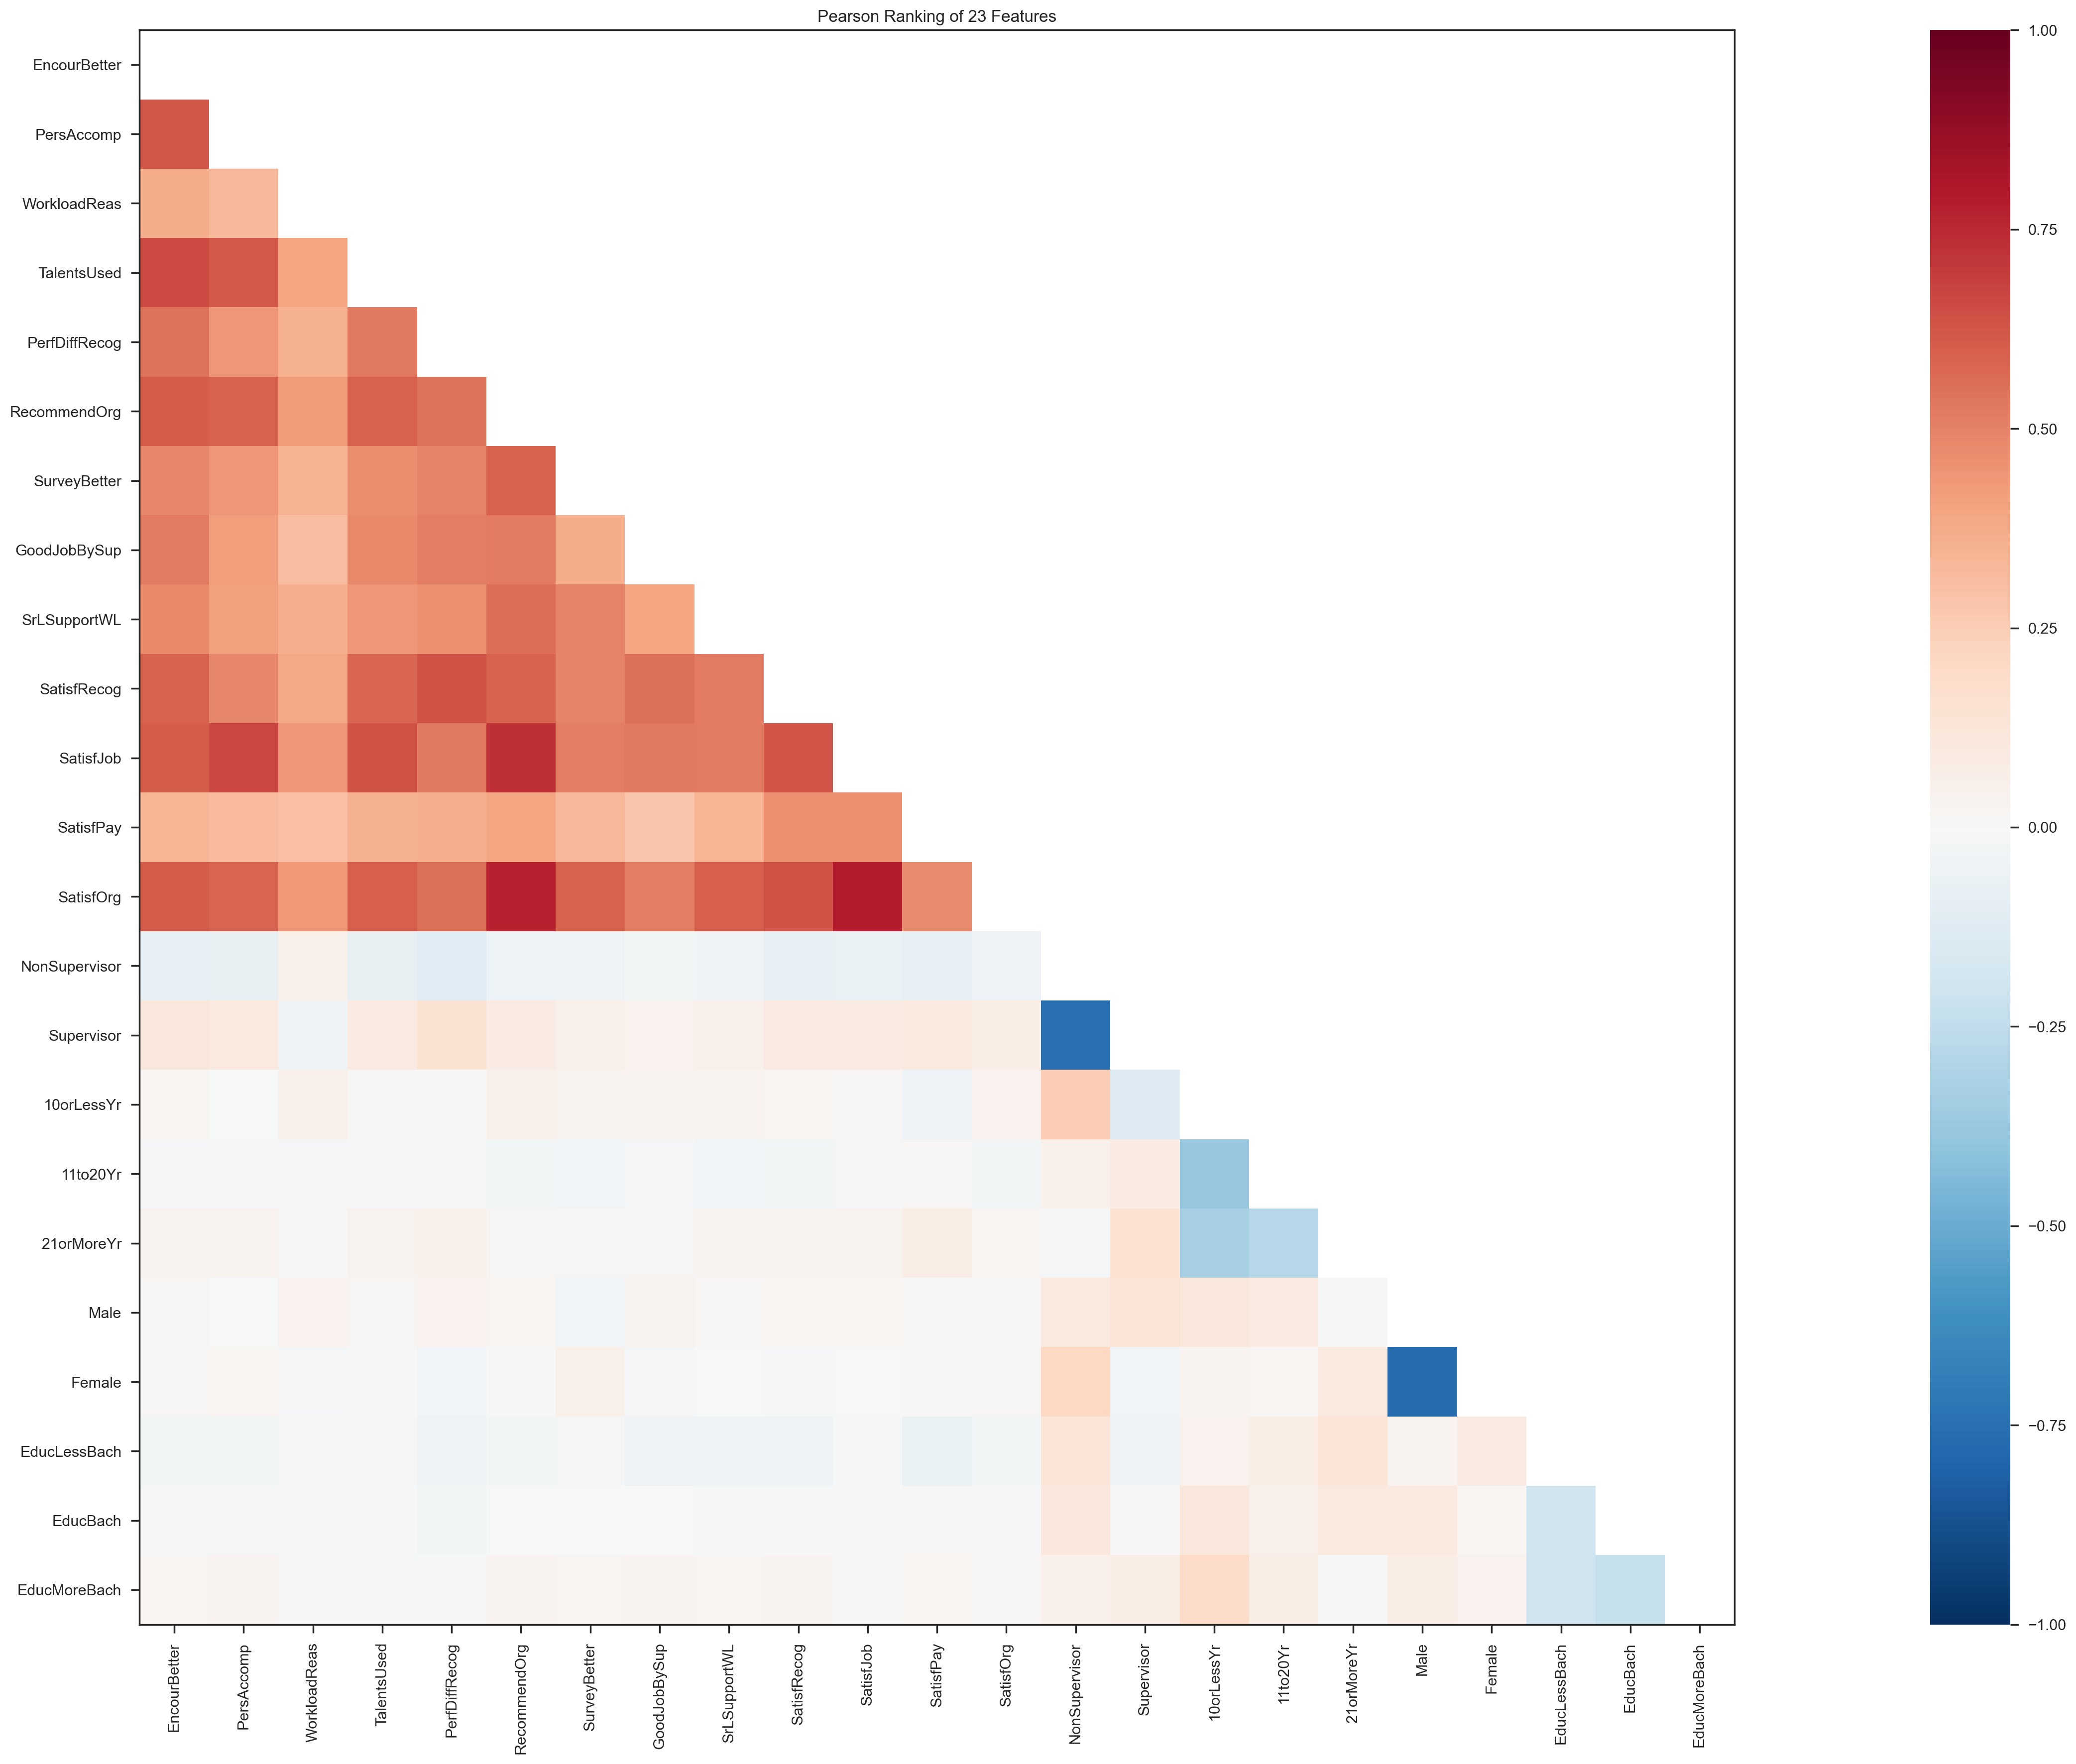

<AxesSubplot:title={'center':'Pearson Ranking of 23 Features'}>

In [92]:
from yellowbrick.features import Rank2D
features = list(X.columns)
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson', features = features, size=(5080, 2080))
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.show()

## y ClassBalance

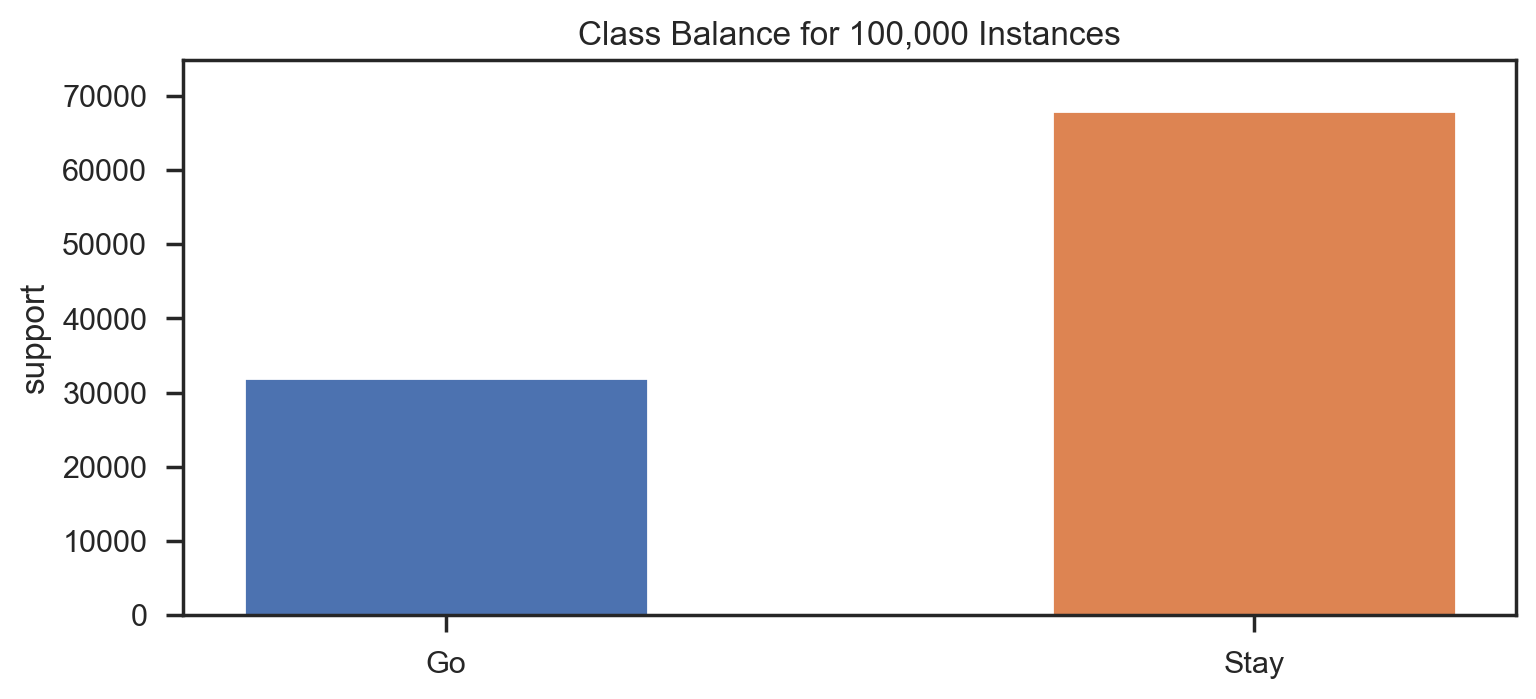

<AxesSubplot:title={'center':'Class Balance for 100,000 Instances'}, ylabel='support'>

In [106]:

from yellowbrick.target import ClassBalance
# Instantiate the visualizer
visualizer = ClassBalance(
    labels=[ "Go","Stay"], size=(860, 360)
)

visualizer.fit(y)
visualizer.show()

In [107]:
#split data
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

In [108]:
# transform y
LE = LabelEncoder().fit(y)
y_train = LE.transform(y_train)
y_test = LE.transform(y_test)

In [109]:
# transform x
ohe=OneHotEncoder().fit(X)
X_train = ohe.transform(X_train)
X_test = ohe.transform(X_test)

## model evaluations

In [110]:
#to make sure all team members produce the same results across different machines
import numpy as np
np.random.seed(100)

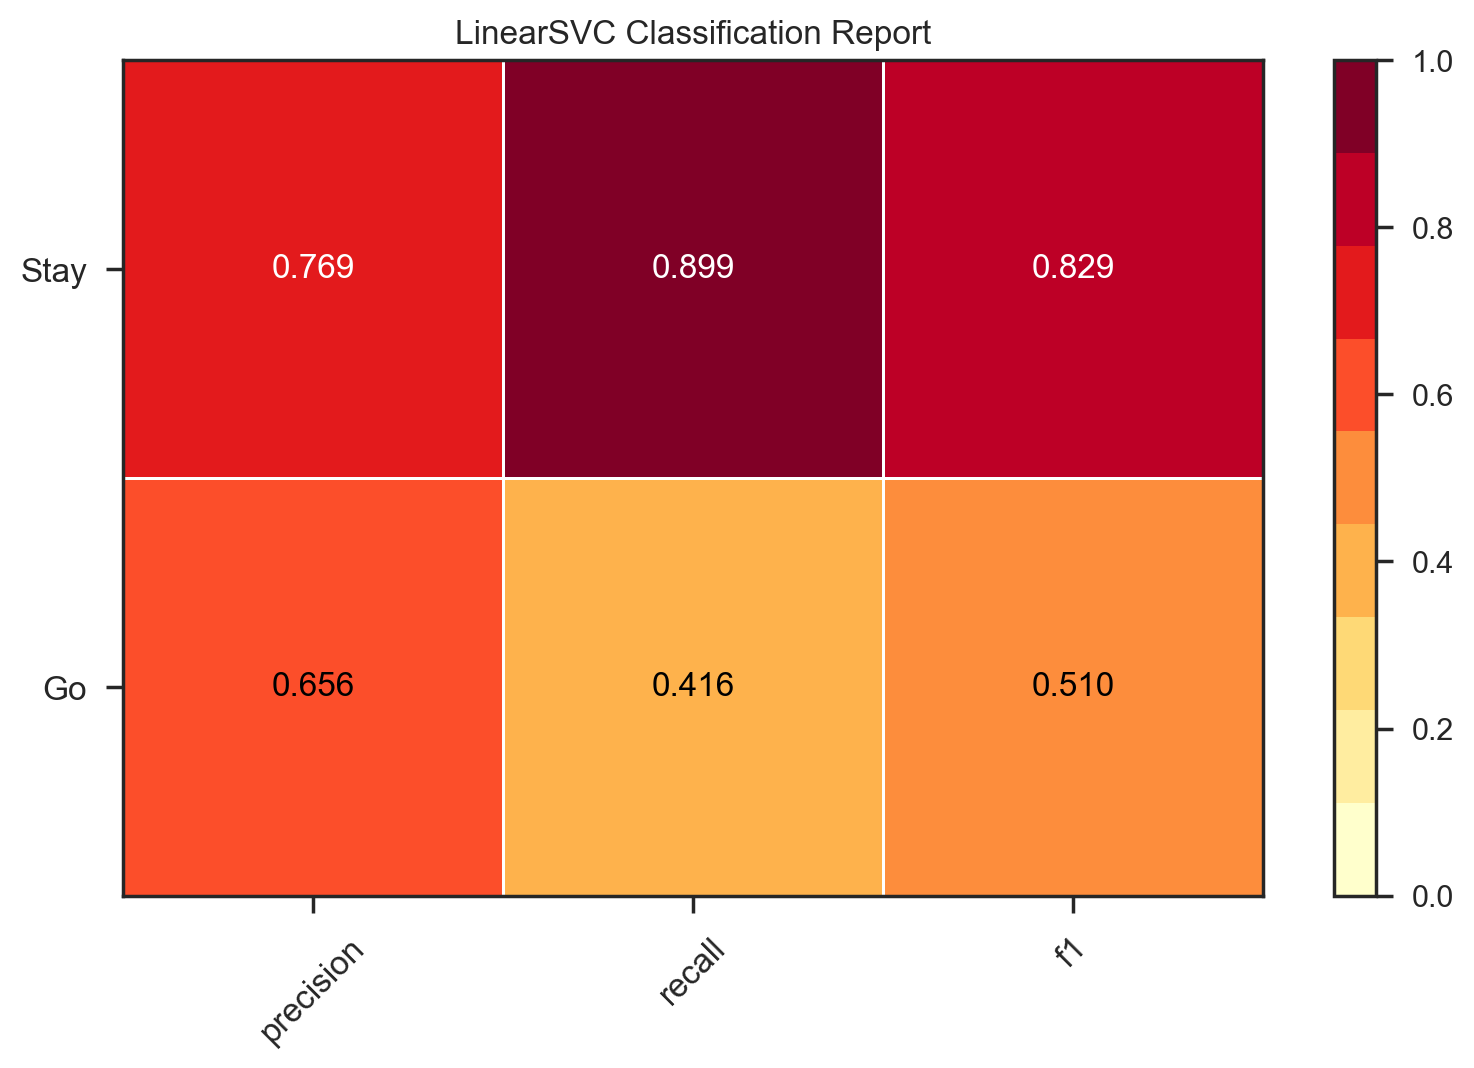

<AxesSubplot:title={'center':'LinearSVC Classification Report'}>

In [111]:
#LinearSVC()
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport( LinearSVC(),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

/Users/wuc3/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/wuc3/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


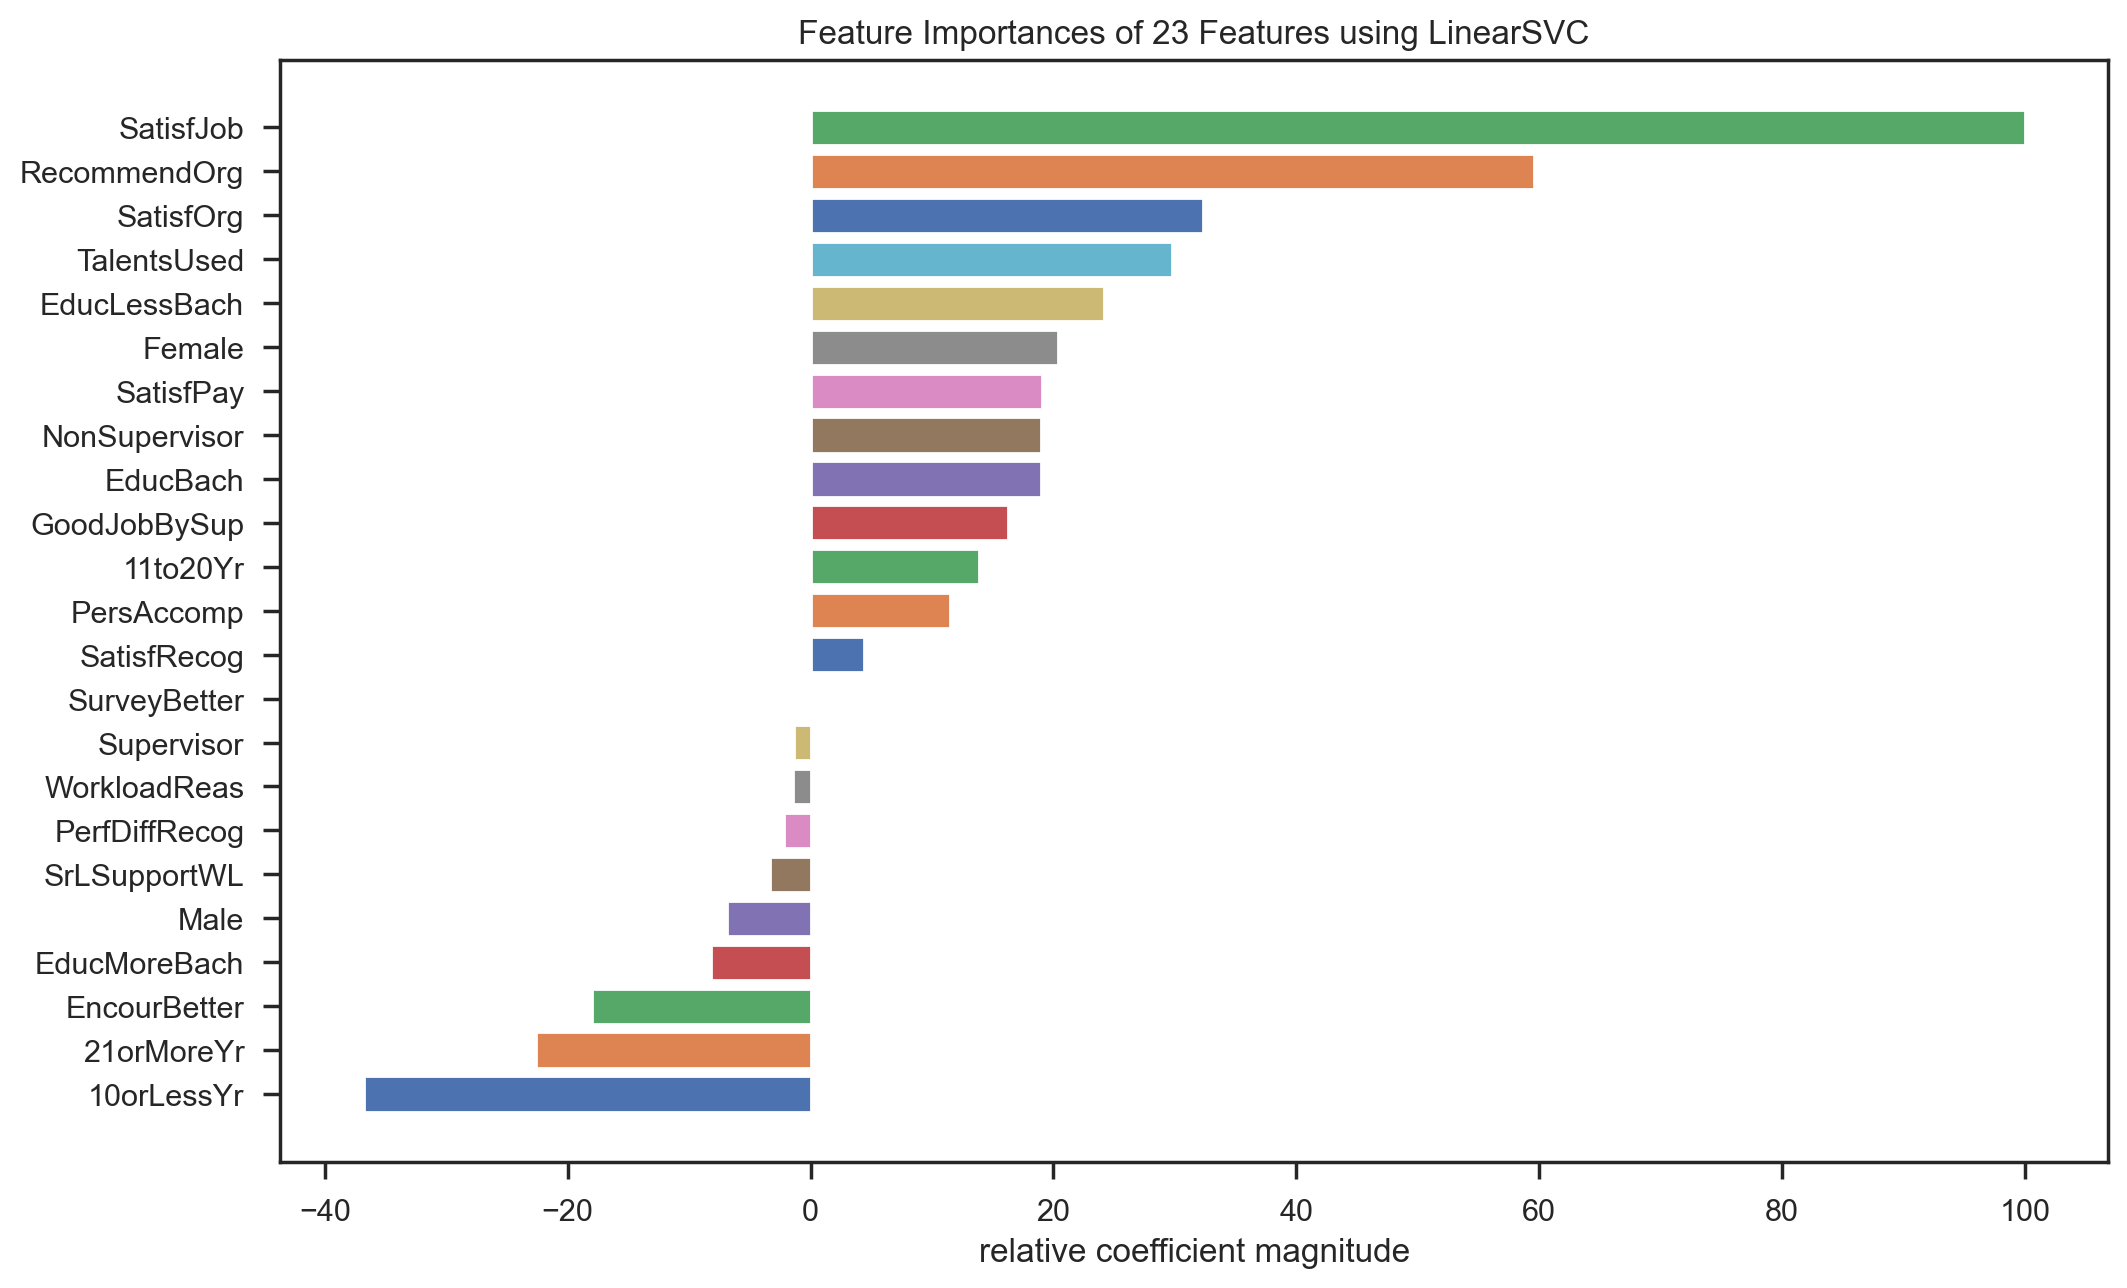

<AxesSubplot:title={'center':'Feature Importances of 23 Features using LinearSVC'}, xlabel='relative coefficient magnitude'>

In [112]:
from yellowbrick.features import FeatureImportances

viz = FeatureImportances( LinearSVC(), size=(1080, 660))
viz.fit(X, y)
viz.show()

/Users/wuc3/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


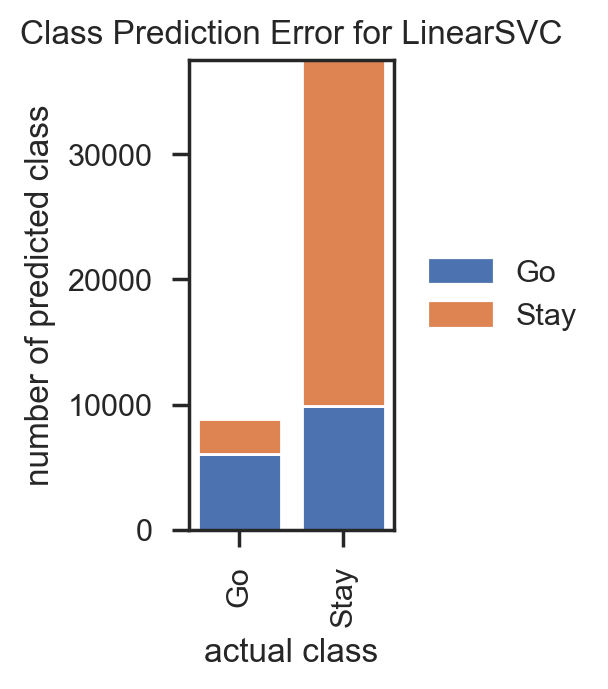

In [114]:
e=LinearSVC()
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassPredictionError

def prediction_error(X,y,e):
    classes = [ 'Go','Stay']

# Perform 80/20 training/test split
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50)

# Instantiate the classification model and visualizer
    visualizer = ClassPredictionError(
    e, 
    classes=classes, size=(360, 360)
    )

# Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
    visualizer.score(X_test, y_test)

# Draw visualization
    visualizer.show()
#prediction_error(X,y,e)
prediction_error(X,y,e)

/Users/wuc3/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/wuc3/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/wuc3/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/wuc3/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/wuc3/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

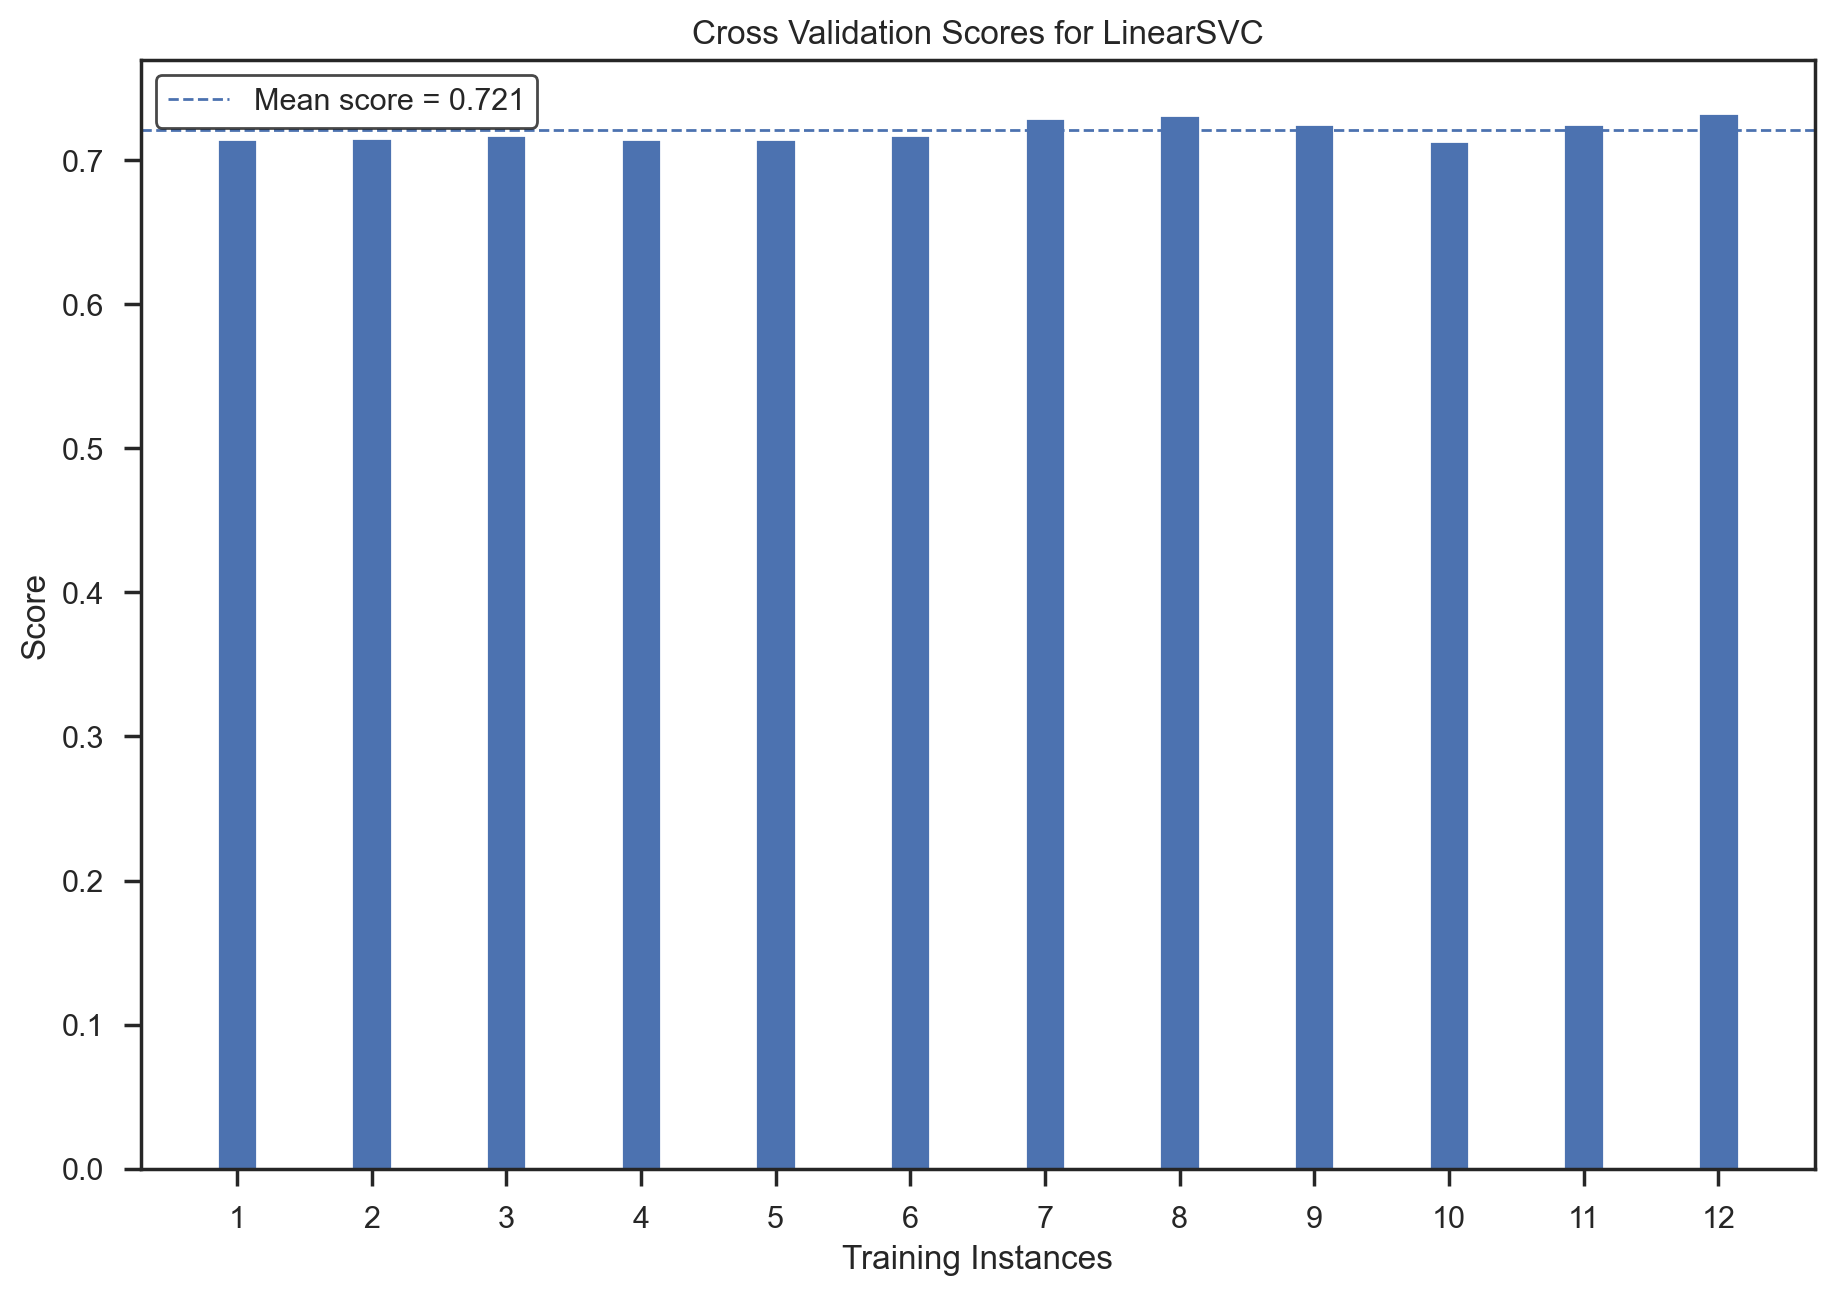

In [115]:

from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import CVScores

# Load the classification data set
model= LinearSVC()
def cross_validation(X, y,model):
# Create a cross-validation strategy
#cv = StratifiedKFold(n_splits=12, random_state=42)
    cv = StratifiedKFold(n_splits=12)
# Instantiate the classification model and visualizer

    visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
    )

    visualizer.fit(X, y)
    visualizer.show()
cross_validation(X, y,model)

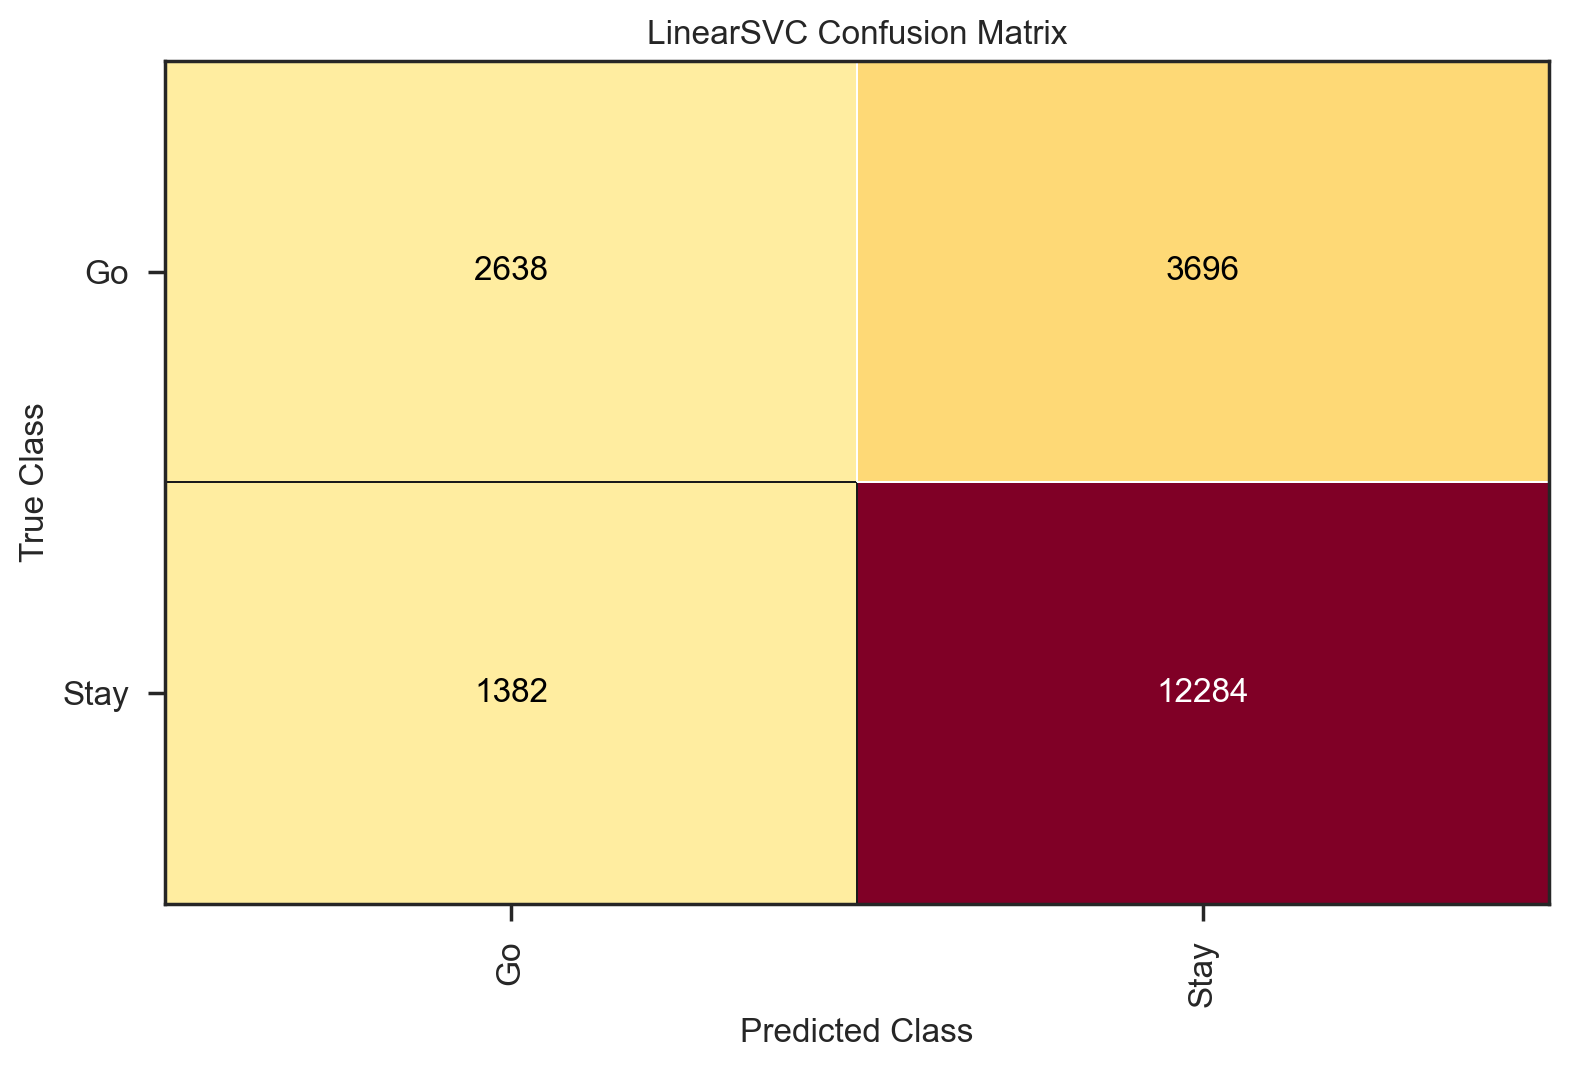

<Figure size 800x550 with 0 Axes>

In [117]:
#https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html
    
from yellowbrick.classifier import confusion_matrix

#IS NP.RANDOM.SEED needed here?
np.random.seed(100)
confusion_matrix(LinearSVC(),X_train, y_train, X_test, y_test,classes=['Go','Stay'])
plt.tight_layout()